# Homework 4: Task 2 - Visualizing fires with false color images

Author: Zach Loo

[GitHub Repository Link](https://github.com/zachyyy700/eds220-hwk4)

## **About**

- Purpose: Practice working with **xarray** data and creating images from remote sensing data.

- Highlights:

    - Explore xarray data format
    - Handle extreme values in remote sensing data
    - Plot true color images
    - Plot false color images

- Data: 
    - Fire perimeter data: Sourced from CAL FIRE hosted by California's Open Data Portal. This dataset contains information and geometries for wildfires in California.
    - Landsat data: Sourced from the Landsat Collection 2 Level-2 atmosperically corrected surface reflectance data, courtesy of the Landsat 8 satelliite.

**References**

Earth Resources Observation and Science (EROS) Center. (2025). Landsat 8-9 Operational Land Imager / Thermal Infrared Sensor Level-2, Collection 2 [dataset]. U.S. Geological Survey. https://doi.org/10.5066/P9OGBGM6. Accessed November 16, 2025, via Microsoft Planetary Computer: https://planetarycomputer.microsoft.com/dataset/landsat-c2-l2.

CAL FIRE / California Department of Forestry and Fire Protection. (2025). California Fire Perimeters (all) [dataset]. State of California. Accessed November 16, 2025, from https://data.ca.gov/dataset/california-fire-perimeters-all

In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import geopandas as gpd
import xarray as xr
import rioxarray as rioxr
from janitor import clean_names
from matplotlib.lines import Line2D

- Fire Perimeter data source: https://data.ca.gov/dataset/california-fire-perimeters-all

In [3]:
# Load data
fp1 = os.path.join("data", "California_Historic_Fire_Perimeters_-5643920427189821347.geojson")
perimeter_data = gpd.read_file(fp1).clean_names()

fp2 = os.path.join("data", "landsat8-2025-02-23-palisades-eaton.nc")
landsat_data = xr.open_dataset(fp2)

## 2. Fire Perimeter Data Exploration

In [4]:
print(f"{perimeter_data['decades'].value_counts()}\n")
print(f"{perimeter_data.crs}\n")
print(f"{perimeter_data.crs.is_projected}")

decades
1950-1959            7012
2010-2019            3425
2000-2009            2905
1980-1989            2208
2020-January 2025    2036
1990-1999            1992
1970-1979            1879
1960-1969            1276
Name: count, dtype: int64

EPSG:3857

True


**Fire perimeter description**: The fire perimeter data was downloaded from CAL FIRE hosted by California's Open Data Portal. Some preliminary findings about the data included the unique observation counts of the decade variable. It was interesting to see how many observations of wildfires there is for each decade in the data. Next, the CRS was shown to be EPSG:3857 and it is also a projected CRS.

In [5]:
# Filter perimeter data to fires of interest
palisades_eaton = perimeter_data[(perimeter_data['fire_name'].isin(['PALISADES', 'EATON'])) & 
                                  (perimeter_data['year_'] == 2025)]

<Axes: >

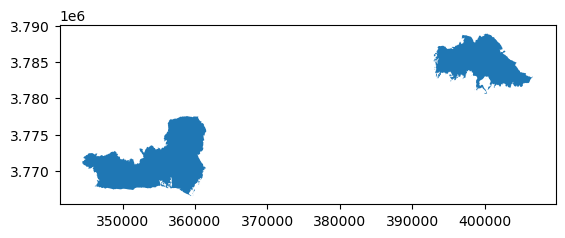

In [21]:
# Initial plot
palisades_eaton.plot()

## 3. Landsat Data Exploration

In [ ]:
# Check landsat type
type(landsat_data)

xarray.core.dataset.Dataset

In [ ]:
# Get landsat overview
landsat_data

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B ...
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

In [9]:
print(f"{landsat_data.data_vars}\n")
print(f"{landsat_data.coords}\n")
print(f"{landsat_data.time.values}\n")
print(f"{landsat_data.dims}")

Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...
    spatial_ref  int64 8B ...

Coordinates:
  * y        (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x        (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time     datetime64[ns] 8B ...

2025-02-23T18:28:13.651369000

FrozenMappingWarningOnValuesAccess({'y': 1418, 'x': 2742})


**Landsat description**: Preliminary exploration of the landsat data yielded information on the data's dimensions, coordinates, and variables. This is an xarray Dataset, thus it contains 2D numpy arrays for each variable present in the data. These variables are each a spectral band collected by the Landsat 8 satellite. The coordinates of the variables are also included in the data and these are geospatial x and y coordinates. Given that they're in scientific notation like "3.799e+06", these coordinates are likely in meters. Additionally, there is a time coordinate but there is only one value since this data is only from one point in time. This time value was extracted and the data is from February 23, 2025. Last, the dimensions of the variables were found and they have a length of 2742 in the x coordinate and 1418 in the y coordinate.

## 4. Restoring geospatial info

In [10]:
# Print dataset crs
print(landsat_data.rio.crs)

None


In [11]:
# Print spatial ref variable crs
print(landsat_data.spatial_ref.crs_wkt)

PROJCS["WGS 84 / UTM zone 11N",GEOGCS["WGS 84",DATUM["WGS_1984",SPHEROID["WGS 84",6378137,298.257223563,AUTHORITY["EPSG","7030"]],AUTHORITY["EPSG","6326"]],PRIMEM["Greenwich",0,AUTHORITY["EPSG","8901"]],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]],AUTHORITY["EPSG","4326"]],PROJECTION["Transverse_Mercator"],PARAMETER["latitude_of_origin",0],PARAMETER["central_meridian",-117],PARAMETER["scale_factor",0.9996],PARAMETER["false_easting",500000],PARAMETER["false_northing",0],UNIT["metre",1,AUTHORITY["EPSG","9001"]],AXIS["Easting",EAST],AXIS["Northing",NORTH],AUTHORITY["EPSG","32611"]]


- **Note:** Geospatial info like CRS is stored in the `spatial_ref` variable of the data. This can be extracted and stored to apply the geospatial information with `.rio.write_crs()`.

In [12]:
# Set dataset CRS
landsat_data.rio.write_crs(landsat_data.spatial_ref.crs_wkt, inplace=True)

<xarray.Dataset> Size: 78MB
Dimensions:      (y: 1418, x: 2742)
Coordinates:
  * y            (y) float64 11kB 3.799e+06 3.799e+06 ... 3.757e+06 3.757e+06
  * x            (x) float64 22kB 3.344e+05 3.344e+05 ... 4.166e+05 4.166e+05
    time         datetime64[ns] 8B 2025-02-23T18:28:13.651369
    spatial_ref  int64 8B 0
Data variables:
    red          (y, x) float32 16MB ...
    green        (y, x) float32 16MB ...
    blue         (y, x) float32 16MB ...
    nir08        (y, x) float32 16MB ...
    swir22       (y, x) float32 16MB ...

In [13]:
# Print newly assigned crs
print(landsat_data.rio.crs)

EPSG:32611


## 5. True color image

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


/Users/zachloo/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


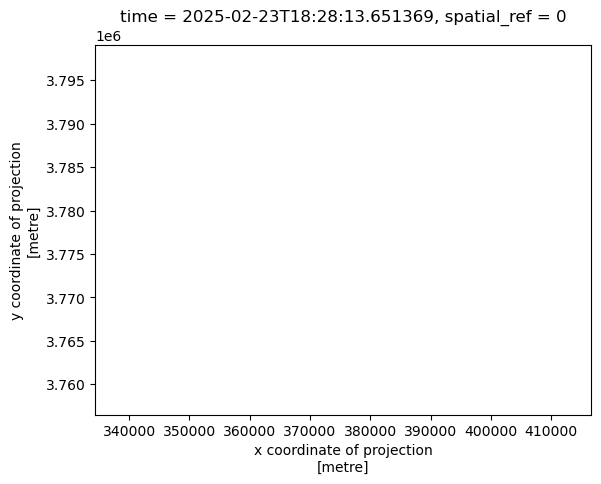

In [14]:
# Select red, green, blue variables
landsat_data[['red', 'green', 'blue']].to_array().plot.imshow()

- **Note:** Extreme values from clouds are messing up the color projection onto our plot. Setting the `robust` argument in `.plot.imshow()` ignores these extreme values and the true color image can be seen.

/Users/zachloo/opt/anaconda3/envs/eds220-env/lib/python3.11/site-packages/matplotlib/cm.py:478: RuntimeWarning: invalid value encountered in cast
  xx = (xx * 255).astype(np.uint8)


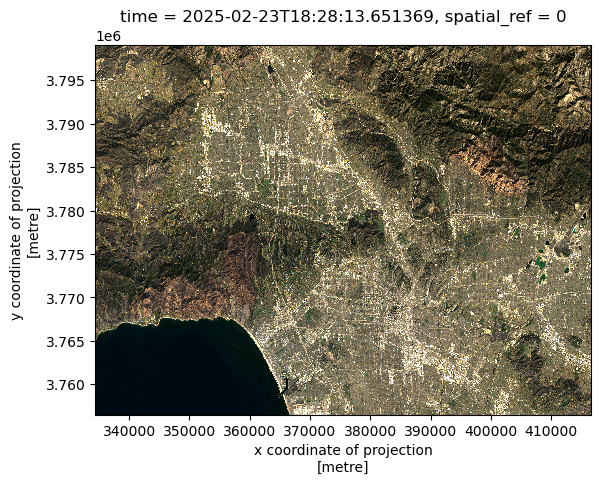

In [15]:
# Use robust argument
landsat_data[['red', 'green', 'blue']].to_array().plot.imshow(robust=True)

- **Note:** `np.nan` values are invalid values for `.plot.imshow()` to plot. The bands that contain nan values can be identified and then handled with `.fillna()`, where nan values are replaced with a specified value.

In [16]:
# Find which bands have nan values
for i in ['red', 'blue', 'green']:
    band = landsat_data[i].values
    print(f"{i} band has {np.isnan(band).sum()} nan values")

red band has 0 nan values
blue band has 109 nan values
green band has 1 nan values


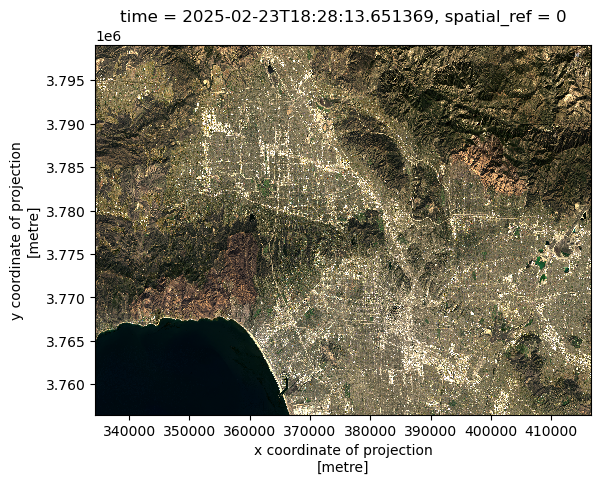

In [17]:
# Fill nans with 0 & plot
landsat_data[['red', 'green', 'blue']].fillna(value=0).to_array().plot.imshow(robust=True)

**Initial and final plot comparison:** Initially trying to plot the true color image came with two issues. One, extreme values (mainly clouds) in the landsat data were affecting the color plotting. To fix this, setting the robust parameter to True made xarray ignore the top and bottom 2% extreme color values and the true color image could be seen. Next, invalid values were also present in the data. These were np.nan values and xarray doesn't know what to do with these. Instead, we replace these with 0 and we end up with a final true color plot with no warnings.

## 6. False color image

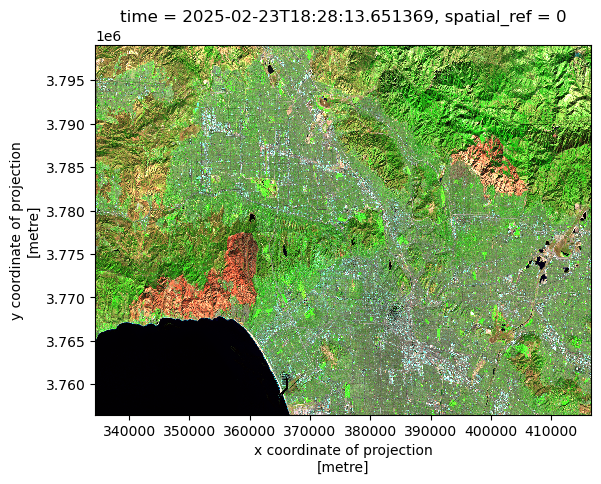

In [18]:
# Input different bands into rgb channels for false color image
landsat_data[['swir22', 'nir08', 'red']].fillna(value=0).to_array().plot.imshow(robust=True)

## 7. Map

In [19]:
# Set crs of fire perimeter data to match landsat data
palisades_eaton = palisades_eaton.to_crs("EPSG:32611")

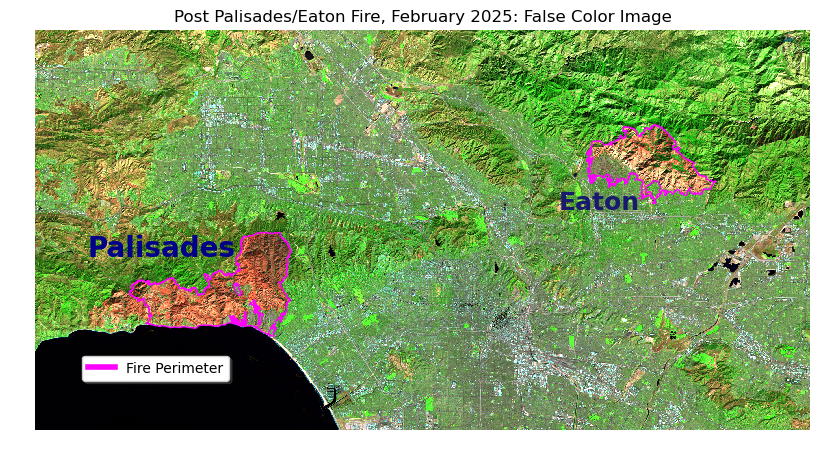

In [20]:
# Initialize figure
fig, ax = plt.subplots(figsize=(10,8))

# Turn off axes
ax.axis('off')

# Plot landsat false color
landsat_data[['swir22', 'nir08', 'red']].fillna(value=0).to_array().plot.imshow(ax=ax, robust=True)
# Plot fire perimeters on top of false color image
palisades_eaton.plot(ax=ax, facecolor='None', edgecolor='fuchsia')

# Add fire text
ax.text(x=340000, y=3775000, s="Palisades", fontsize=20, color='darkblue', weight='bold')
ax.text(x=390000, y=3780000, s="Eaton", fontsize=18, color='midnightblue', weight='bold')

# Custom legend
custom_line = [Line2D([0], [0], color='fuchsia', lw=4)]
fig.legend(custom_line, ['Fire Perimeter'],  loc=(0.1, 0.2), fontsize=10, shadow=True)

plt.title("Post Palisades/Eaton Fire, February 2025: False Color Image")
plt.show()

**Map description:** For this false color image map, short-wave infrared (SWIR) was assigned to the red channel, near-infrared (NIR) to the green, and red to the blue channel. This combination was used to see the effects after the January 2025 Palisades-Eaton fires. Areas affected by the fires standout as a bright orange, almost red color. The actual perimeter of the fires are outlined in pink.